# Introduction to Deep Learning in Python

> EXploring fundamentals of neural networks and how to build deep learning models using Keras 2.0

- author: Victor Omondi
- toc: true
- comments: true
- categories: [deep-learning]

# Overview

Deep learning is the machine learning technique behind the most exciting capabilities in diverse areas like robotics, natural language processing, image recognition, and artificial intelligence, including the famous AlphaGo. We'll gain hands-on, practical knowledge of how to use deep learning with Keras 2.0, the latest version of a cutting-edge library for deep learning in Python.

# Libraries

In [1]:
%matplotlib inline

import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

## Libraries Configuration

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

plt.style.use('fivethirtyeight')

# Basics of deep learning and neural networks

We'll become familiar with the fundamental concepts and terminology used in deep learning, and understand why deep learning techniques are so powerful today. We'll build simple neural networks and generate predictions with them.

## Introduction to deeplearning

### Interactions

- Neural networks account for interactions really well
- Deep learning uses especially powerful neural networks
  - Text
  - Images
  - Videos
  - Audio
  - Source code


## Forward propagation

- Multiply - add process
- Dot product
- Forward propagation for one data point at a time
- Output is the prediction for that data point


### Forward propagation code

In [3]:
input_data = np.array([2,3])

weights = {
    'node_0': np.array([1, 1]),
    'node_1': np.array([-1, 1]),
    'output': np.array([2, -1])
}

node_0_value = (input_data*weights['node_0']).sum()
node_1_value = (input_data*weights['node_1']).sum()
hidden_layer_values = np.array([node_0_value, node_1_value])
hidden_layer_values

array([5, 1])

In [4]:
output = (hidden_layer_values*weights['output']).sum()
output

9

## Activation functions


An "activation function" is a function applied at each node. It converts the node's input into some output.
* Applied to node inputs to produce node output

### ReLU (Rectied Linear Activation)

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

$$
\mbox{RELU}(x) = \left\{
    \begin{array} \\
        0 & \mbox{if} \ x<0 \\
        x & \mbox{if} \ x>=0
    \end{array}
\right.
$$

Here are some examples:
```python
relu(3) = 3
relu(-3) = 0
```

In [5]:
input_data = np.array([-1, 2])

weights = {
    'node_0': np.array([3, 3]),
    'node_1': np.array([1, 5]),
    'output': np.array([2, -1])
}

node_0_input = (input_data*weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)
node_0_output

0.9950547536867305

In [6]:
node_1_input = (input_data*weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)
node_1_output

0.999999969540041

In [7]:
hidden_layer_values = np.array([node_0_output, node_1_output])
hidden_layer_values

array([0.99505475, 0.99999997])

In [8]:
output = (hidden_layer_values*weights['output']).sum()
output

0.9901095378334199

In [9]:
def relu(input_data):
    '''This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.'''
    
    return(max(input_data, 0))




In [10]:
input_data = np.array([3, 5])
weights = {
    'node_0': np.array([2, 4]), 
    'node_1': np.array([ 4, -5]), 
    'output': np.array([2, 7])
}

# node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


## Deeper networks


### Representation learning
The model training process sets weights that determine the features/interactions in Neural Networks to optimize predictive accuracy.
The last layers capture the most complex interactions.
- Deep networks internally build representations of patterns in the data
- Partially replace the need for feature engineering
- Subsequent layers build increasingly sophisticated representationsof raw data


### Deep learning

- Modeler doesn't need to specify the interactions
- When you train the model, the neural network gets weights that find the relevant patterns to make better predictions


### Multi-layer neural networks

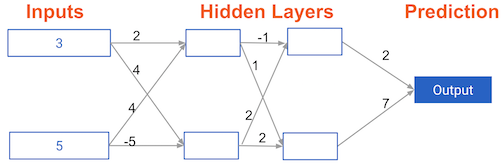

In [11]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * [2,4]).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data*[4, -5]).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs*[-1, 2]).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs*[1, 2]).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs*[2,7]).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(np.array([3, 5]))
print(output)


182


The network generated a prediction of  `182` .

# Optimizing a neural network with backward propagation

Exploring how to optimize the predictions generated by neural networks. We'll use a method called backward propagation, which is one of the most important techniques in deep learning.

## The need for optimization

### Predictions with multiple points

- Making accurate predictions gets harder with more points
- At any set of weights, there are many values of the error
- ... corresponding to the many points we make predictions for

### Loss function

- Aggregates errors in predictions from many data points into single number
- Measure of model's predictive performance
- Lower loss function value means a better model
- Goal: Find the weights that give the lowest value for the loss function
- Gradient descent

### Gradient descent

### how weight changes affect accuracy

We'll get to change weights in a real network and see how they affect model accuracy!

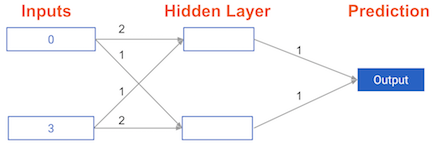

In [12]:
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [13]:
# The data point we will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# error
error_0 = model_output_0 - target_actual

# weights that cause the network to make perfect prediction (3)
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# error
error_1 = model_output_1 - target_actual

print(error_0)
print(error_1)


6
0


### Scaling up to multiple data points

We'll compare model accuracies for two different sets of weights, which have been stored as  `weights_0`  and  `weights_1`.

In [14]:
weights_0 = {
    'node_0': np.array([2, 1]), 
    'node_1': np.array([1, 2]), 
    'output': np.array([1, 1])
}
weights_1 = {
    'node_0': np.array([2, 1]),
    'node_1': np.array([1. , 1.5]),
    'output': np.array([1. , 1.5])
}

`input_data`  is a list of arrays. Each item in that list contains the data to make a single prediction.  `target_actuals`  is a list of numbers. Each item in that list is the actual value we are trying to predict.

In [15]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals= [1, 3, 5, 7]

We'll use the  `mean_squared_error()`  function from  `sklearn.metrics` . It takes the true values and the predicted values as arguments.

In [16]:
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [17]:
model_output_0 = []
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


It looks like  `model_output_1`  has a higher mean squared error.

## Gradient descent


- If the slope is positive:
  - Going opposite the slope means moving to lower numbers
  - Subtract the slope from the current value
  - Too big a step might lead us astray
- Solution: learning rate
  - Update each weight by subtracting learning rate * slope


### Slope calculation

When plotting the mean-squared error loss function against predictions, the slope is  `2 * x * (xb-y)` , or  `2 * input_data * error` . Note that  `x`  and  `b`  may have multiple numbers ( `x`  is a vector for each data point, and  `b`  is a vector). In this case, the output will also be a vector

To calculate the slope for a weight, need to multiply:
- Slope of the loss function w.r.t value at the node we feed into
- The value of the node that feeds into our weight
- Slope of the activation function w.r.t value we feed into

In [18]:
weights = np.array([1,2])
input_data = np.array([3, 4])
target = 6
learning_rate = .01
preds = (weights*input_data).sum()
error = preds-target
error

5

In [19]:
gradient = 2 * input_data * error
gradient

array([30, 40])

In [20]:
weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated*input_data).sum()
error_updated = preds_updated - target
error_updated

2.5

Updating the model weights did indeed decrease the error!

### Making multiple updates to weights

We're now going to make multiple updates to dramatically improve model weights, and see how the predictions improve with each update.

`get_slope()`  function that takes  `input_data` ,  `target` , and  `weights`  as arguments.

In [21]:
def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

In [22]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

`get_mse()`  function that takes the same arguments. The  `input_data` ,  `target` , and  `weights`

In [23]:
def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that  `weights`  is a single array.

In [24]:
input_data = np.array([1, 2, 3])
target = 0
weights = np.array([0, 2, 1])

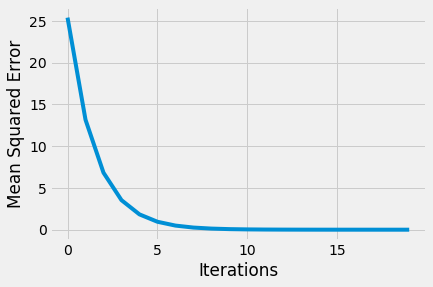

In [25]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - .01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

the mean squared error decreases as the number of iterations go up.

## Backpropagation


Each time you generate predictions using forward propagation, you update the weights using backward propagation.

# Building deep learning models with keras

We'll use the Keras library to build deep learning models for both regression and classification. We'll explore the Specify-Compile-Fit workflow that can be used to make predictions.

## Creating a keras model


### Model building steps

- Specify Architecture
- Compile
- Fit
- Predict

### Understanding the data

We'll be building models in Keras to predict wages based on various professional and demographic factors. Before we start building a model, it's good to understand the data by performing some exploratory analysis.

In [26]:
wages = pd.read_csv('datasets/hourly_wages.csv')
wages

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
529,11.36,0,18,5,29,0,0,0,0,0
530,6.10,0,12,33,51,1,1,0,0,0
531,23.25,1,17,25,48,1,1,0,0,0
532,19.88,1,12,13,31,0,1,1,0,0


In [27]:
wages.describe().T

,count,mean,std,min,25%,50%,75%,max
wage_per_hour,534.0,9.024064,5.139097,1.0,5.25,7.78,11.25,44.5
union,534.0,0.179775,0.384360,0.0,0.00,0.00,0.00,1.0
education_yrs,534.0,13.018727,2.615373,2.0,12.00,12.00,15.00,18.0
experience_yrs,534.0,17.822097,12.379710,0.0,8.00,15.00,26.00,55.0
age,534.0,36.833333,11.726573,18.0,28.00,35.00,44.00,64.0
female,534.0,0.458801,0.498767,0.0,0.00,0.00,1.00,1.0
marr,534.0,0.655431,0.475673,0.0,0.00,1.00,1.00,1.0
south,534.0,0.292135,0.455170,0.0,0.00,0.00,1.00,1.0
manufacturing,534.0,0.185393,0.388981,0.0,0.00,0.00,0.00,1.0
construction,534.0,0.044944,0.207375,0.0,0.00,0.00,0.00,1.0


The target variable we'll be predicting is  `wage_per_hour`. Some of the predictor variables are binary indicators, where a value of 1 represents  `True` , and 0 represents  `False`. Of the 9 predictor variables in the DataFrame, 6 are binary indicators

In [28]:
wages.shape

(534, 10)

In [29]:
wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wage_per_hour   534 non-null    float64
 1   union           534 non-null    int64  
 2   education_yrs   534 non-null    int64  
 3   experience_yrs  534 non-null    int64  
 4   age             534 non-null    int64  
 5   female          534 non-null    int64  
 6   marr            534 non-null    int64  
 7   south           534 non-null    int64  
 8   manufacturing   534 non-null    int64  
 9   construction    534 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


There is no missing value in our dataset.

### Specifying a model

To start, we'll take the skeleton of a neural network and add a hidden layer and an output layer. We'll then fit that model and see Keras do the optimization so the model continually gets better. As a start, We'll predict workers wages based on characteristics like their industry, education and level of experience. 

In [30]:
predictors = wages.drop(columns=['wage_per_hour']).values
target = wages.wage_per_hour.values

# number of columns in predictors
n_cols = predictors.shape[1]

model = Sequential()

# Layers
# 1st Layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
# 2nd Layer
model.add(Dense(32, activation='relu'))
# 3rd Layer - Output Layer
model.add(Dense(1))

## Compiling and fitting a model

### Why Compile a model?

- Specify the optimizer
  - many options are mathematically complex
  - 'Adam' is usually a good choice
- Loss Function:
 - 'mean_squared_error' common for regression
 
To compile the model, we need to specify the optimizer and loss function to use. Adam optimizer is an excellent choice. You can read more about it as well as other keras optimizers [here](https://keras.io/optimizers/#adam), and if you are really curious to learn more, you can read the [original paper](https://arxiv.org/abs/1412.6980v8) that introduced the Adam optimizer.

### Compiling a model

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
print(f"Loss Function: {model.loss}")

Loss Function: mean_squared_error


### Fitting the model

- Applying backpropagation and gradient descent with the data to update the weights
- Scaling the data before fitting can ease the optimization

The data to be used as predictive features is loaded in a NumPy matrix called  `predictors`  and the data to be predicted is stored in a NumPy matrix called  `target` .

In [33]:
model.fit(predictors, target)

17/17 [==============================] - 0s 7ms/step - loss: 23.2720


## Classification models


### Classification

- `'categorical_crossentropy'` loss function
- Similar to log loss: Lower is better.
- Add `metrics=['accuracy']` to compile step for easy-to-understand diagonistics
- Output layer has separate node for each possible outcome, and uses `softmax` activation

### Understanding the classification data

In [34]:
titanic = pd.read_csv('datasets/titanic_all_numeric.csv')
titanic['age_was_missing'] = titanic.age_was_missing.map({False:0, True:1})
titanic

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.000000,1,0,7.2500,1,0,0,0,1
1,1,1,38.000000,1,0,71.2833,0,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,1,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,1,0,0


In [35]:
titanic.shape

(891, 11)

In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   survived                   891 non-null    int64  
 1   pclass                     891 non-null    int64  
 2   age                        891 non-null    float64
 3   sibsp                      891 non-null    int64  
 4   parch                      891 non-null    int64  
 5   fare                       891 non-null    float64
 6   male                       891 non-null    int64  
 7   age_was_missing            891 non-null    int64  
 8   embarked_from_cherbourg    891 non-null    int64  
 9   embarked_from_queenstown   891 non-null    int64  
 10  embarked_from_southampton  891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


In [37]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
male,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
age_was_missing,891.0,0.198653,0.399210,0.00,0.0000,0.000000,0.0,1.0000
embarked_from_cherbourg,891.0,0.188552,0.391372,0.00,0.0000,0.000000,0.0,1.0000
embarked_from_queenstown,891.0,0.086420,0.281141,0.00,0.0000,0.000000,0.0,1.0000


The maximum age in the data is  `80` .

We will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. We will use predictors such as  `age` ,  `fare`  and where each passenger embarked from to predict who will survive. This data is from [a tutorial on data science competitions](https://www.kaggle.com/c/titanic). Look [here](https://www.kaggle.com/c/titanic/data) for descriptions of the features.

### Last steps in classification models

We'll now create a classification model using the titanic dataset. We'll take information about the passengers and predict which ones survived. The target to predict is in  `titanic.survived` , though we'll have to manipulate it for keras.

In [38]:
predictors = titanic.drop(columns=['survived']).values

n_cols = predictors.shape[1]

We'll use the  `'sgd'`  optimizer, which stands for [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

In [39]:
target = to_categorical(titanic.survived)

model = Sequential()

# LAYERS
# 1st Layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
# output Layer
## There are two outcomes; it should have two units  
## and because it is a classification model, the activation should be 'softmax'.
model.add(Dense(2, activation='softmax'))

# Compile
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting
model.fit(predictors, target)

28/28 [==============================] - 0s 2ms/step - loss: 3.3218 - accuracy: 0.5948


This simple model is generating an accuracy of 58!

## Using models


- Save
- Reload
- Make predictions

### Making predictions

In [40]:
pred_data = pd.read_csv('datasets/pred_data.csv')
pred_data['6'] = pred_data['6'].map({False:0, True:1})
pred_data = pred_data.values
pred_data[:5]

array([[  2.    ,  34.    ,   0.    ,   0.    ,  13.    ,   1.    ,
          0.    ,   0.    ,   0.    ,   1.    ],
       [  2.    ,  31.    ,   1.    ,   1.    ,  26.25  ,   0.    ,
          0.    ,   0.    ,   0.    ,   1.    ],
       [  1.    ,  11.    ,   1.    ,   2.    , 120.    ,   1.    ,
          0.    ,   0.    ,   0.    ,   1.    ],
       [  3.    ,   0.42  ,   0.    ,   1.    ,   8.5167,   1.    ,
          0.    ,   1.    ,   0.    ,   0.    ],
       [  3.    ,  27.    ,   0.    ,   0.    ,   6.975 ,   1.    ,
          0.    ,   0.    ,   0.    ,   1.    ]])

In [41]:
predictions = model.predict(pred_data)
predicted_prob_true = predictions[:, 1]
predicted_prob_true[:5]

array([0.23549911, 0.4757725 , 0.9933542 , 0.68198895, 0.18131228],
      dtype=float32)

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


# Fine-tuning keras models

Explore how to optimize deep learning models in Keras. Start by exploring how to validate models, then understand the concept of model capacity, and finally, experiment with wider and deeper networks.

## Understanding model optimization

### Why optimization is hard

- Simultaneously optimizing 1000s of parameters with complex relationships
- Updates may not improve model meaningfully
- Updates too small (if learning rate is low) or too large (if learningrate is high)


### Vanishing gradients

- Occurs when many layers have very small slopes (e.g. due to being on flat part of tanh curve)
- In deep networks, updates to backprop were close to 0


### Changing optimization parameters

We'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. We'll look at the results after running, remembering that a low value for the loss function is good.

The optimization should start from scratch every time we change the learning rate, to give a fair comparison of how each learning rate did in the results. So we'll have to create a function `get_new_model()` that creates an unoptimized model to optimize.

In [43]:
def get_new_model(input_shape = (n_cols,)):
    """creates an unoptimized model to optimize"""
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [44]:
#  list of learning rates
lr_to_test = [.000001, .01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # new model to test, unaffected by previous models
    model = get_new_model()
    
    # SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

28/28 [==============================] - 0s 2ms/step - loss: 2.6486


Testing model with learning rate: 0.010000

28/28 [==============================] - 0s 1ms/step - loss: 1.7959


Testing model with learning rate: 1.000000

28/28 [==============================] - 0s 1ms/step - loss: 67313952.0000


## Model validation


### Validation in deep learning

- Commonly use validation split rather than cross-validation
- Deep learning widely used on large datasets
- Single validation score is based on large amount of data, and is reliable
- Repeated training from cross-validation would take long time


In [45]:
model = get_new_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target, validation_split=.3)

20/20 [==============================] - 1s 34ms/step - loss: 0.7311 - accuracy: 0.6148 - val_loss: 0.8024 - val_accuracy: 0.6418


### Early Stopping
early stopping can be used to stop optimization when it isn't helping any more. 

In [46]:
early_stopping_monitor = EarlyStopping(patience=2)
model.fit(predictors, target, validation_split=.3, epochs=20, callbacks=[early_stopping_monitor])

Epoch 1/20
20/20 [==============================] - 0s 4ms/step - loss: 0.7024 - accuracy: 0.6597 - val_loss: 0.6368 - val_accuracy: 0.6455
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.6758 - val_loss: 0.5178 - val_accuracy: 0.7388
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6886 - val_loss: 0.5066 - val_accuracy: 0.7724
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.6870 - val_loss: 0.5977 - val_accuracy: 0.7201
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.7095 - val_loss: 0.5118 - val_accuracy: 0.7910


Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 20 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 5 epochs.

### Experimentation
- Experiment with different architectures
- More layers
- Fewer layers
- Layers with more nodes
- Layers with fewer nodes
- Creating a great model requires experimentation


### Experimenting with wider networks

We'll create a new model called  `model_2`  which is similar to  `model` , except it has 100 units in each hidden layer.

After we create  `model_2` , both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We'll add the argument  `verbose=False`  in the fitting commands to print out fewer updates, since we will look at these graphically instead of as text.

In [49]:
# the new model
model_2 = Sequential()

model_2.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model_2.add(Dense(100, activation = 'relu', input_shape=(n_cols,)))

model_2.add(Dense(2, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# Fit model_1
model_1_training = model.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

In [52]:
# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

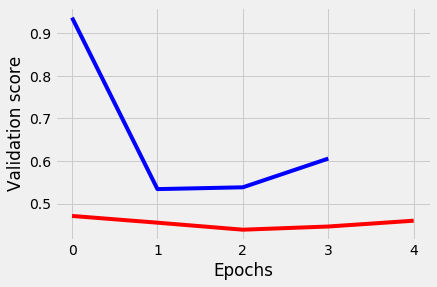

In [53]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

New model had a lower loss value, so it is the better model.

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 202       
Total params: 11,402
Trainable params: 11,402
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 202       
Total params: 11,402
Trainable params: 11,402
Non-trainable params: 0
_________________________________________________________________


### Adding layers to a network

We'll try a deeper network (more hidden layers).

In [56]:
input_shape = (n_cols,)
model_2 = Sequential()

model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu', input_shape=input_shape))

model_2.add(Dense(2, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
# Fit model 1
model_1_training = model.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

In [58]:
# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

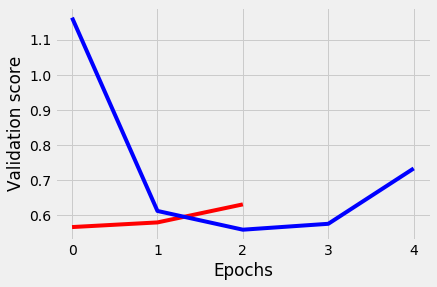

In [59]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

 The model with the lower loss value is the better model.